In [1]:
options(warn=-1)
#install.packages('runjags')
#install.packages('gridExtra')
library(tidyverse)
library(coda)
library(grid)
library(gridExtra)
library(rjags)
library(runjags)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Linked to JAGS 4.1.0
Loaded modules: basemod,bugs

Attaching package: ‘runjags’

The following object is masked from ‘package:tidyr’:

    extract



In [ ]:
#install.packages('tidybayes')
#install.packages('gridExtra')
#options(warn=-1)
#library(tidyverse)
#library(coda)
#library(gridExtra)
#library(tidybayes)

# Exercise 1

• given the following un-normalized posterior distribution draw a Markov Chain from the posterior distribution using a Metropolis-Hastings algorithm

In [ ]:
# target.post = function(theta){
#     res = 0.5 * exp( -0.5*(theta + 3)^2) + 0.5 * exp( -0.5*(theta - 3)^2 )
#     return(res)
# }

# log10.func <- function(theta){
#     return(log10( target.post(theta)))
# }

# # Parameters :
# # func : a function whose first argument is a real vector of parameters
# # func returns a log10 of the likelihood function
# # theta.init : the initial value of the Markov Chain (and of func)
# # n.sample: number of required samples
# # sigma : standar deviation of the gaussian MCMC sampling pdf

# metropolis.1dim <- function(func , theta.init , n.sample , sigma){
#     theta.cur <- theta.init
#     func.Cur <- func(theta.cur)
#     func.Samp <- matrix(data=NA , nrow=n.sample , ncol=2+1)
#     n.accept <- 0
#     rate.accept <- 0.0
#     for (n in 1:n.sample) {
        
#         theta.prop <- rnorm(n=1, mean = theta.cur , sigma)
#         func.Prop <- func(theta.prop)
#         logMR <- func.Prop - func.Cur # Log10 of the Metropolis ratio
        
#         if ( logMR >=0 || logMR >log10(runif(1)) ) {
            
#             theta.cur <- theta.prop
#             func.Cur <- func.Prop
#             n.accept <- n.accept + 1
#         }
        
#         func.Samp[n, 1] <- func.Cur
#         func.Samp[n, 2] <- theta.cur
#     }
#     return(func.Samp)
# }

# theta.init <- -5
# sample.sig <- 10
# n.sample <- 10^5
# # demo <- TRUE

# set.seed(1)

# chain <- metropolis.1dim(func=log10.func,
#                           theta.init=theta.init,
#                           n.sample=n.sample,
#                           sigma=sample.sig^2)

# dtheta = 0.001
# theta = seq(-10, 10, dtheta)
# y  = target.post(theta) / sum(target.post(theta)*dtheta)

# c.chain1 <- as.mcmc(chain[,2], thin=1000)
# my.lags = seq(0,500,10)
# y1 <- autocorr(c.chain1, lags=my.lags)

# p1 = ggplot()+
# geom_line(aes(x=theta, y=y, color='Target Posterior'))+
# stat_bin(aes(x=chain[,2],y=after_stat(density),color = 'MCMC sampling'),
#          linetype='dashed',
#          geom="step",
#          linewidth=0.7,
#          breaks=seq(from=min(theta),to=max(theta),length.out=100))+
# labs(title='Markov Chain sampling from target posterior', x='theta', y='Probability')+
# scale_color_brewer(palette="Dark2")

# p2 = ggplot() + geom_point(aes(x = my.lags, y = y1))+
# labs(title=paste0('Autocorrelation function, Effective size =', sprintf('%.2f',effectiveSize(c.chain1))), x = 'lags', y = 'AEF')
# options(repr.plot.width = 10, repr.plot.height =3)
# grid.arrange(grobs=list(p1, p2), ncol=2)

• use a Norm (0, 1) as random-walk candidate density

• plot the sampled distribution

• analyze the chain with the CODA package and plot the chain autocorrelation

• try to use different burn-in cycles and thinning and plot the corresponding posterior distribution
and the chain autocorrelation function. What are the best parameters ?

In [ ]:
iter.coda = function(burn.in, thinning, sig){
    target.post = function(theta){
        res = 0.5 * exp( -0.5*(theta + 3)^2) + 0.5 * exp( -0.5*(theta - 3)^2 )
        return(res)
    }

    log10.func <- function(theta){
        return(log10( target.post(theta)))
    }

    # Parameters :
    # func : a function whose first argument is a real vector of parameters
    # func returns a log10 of the likelihood function
    # theta.init : the initial value of the Markov Chain (and of func)
    # n.sample: number of required samples
    # sigma : standar deviation of the gaussian MCMC sampling pdf

    metropolis.1dim <- function(func , theta.init , n.sample , sigma){
        theta.cur <- theta.init
        func.Cur <- func(theta.cur)
        func.Samp <- matrix(data=NA , nrow=n.sample , ncol=2+1)
        n.accept <- 0
        rate.accept <- 0.0
        for (n in 1:n.sample) {

            theta.prop <- rnorm(n=1, mean = 0 , sigma)
            func.Prop <- func(theta.prop)
            logMR <- func.Prop - func.Cur # Log10 of the Metropolis ratio

            if ( logMR >=0 || logMR >log10(runif(1)) ) {

                theta.cur <- theta.prop
                func.Cur <- func.Prop
                n.accept <- n.accept + 1
            }

            func.Samp[n, 1] <- func.Cur
            func.Samp[n, 2] <- theta.cur
        }
        return(func.Samp)
    }

    theta.init <- -5
    sample.sig <- sig
    n.sample <- 10^5
    # demo <- TRUE

    set.seed(1)

    chain <- metropolis.1dim(func=log10.func,
                              theta.init=theta.init,
                              n.sample=n.sample,
                              sigma=sample.sig^2)

    dtheta = 0.001
    theta = seq(-10, 10, dtheta)
    y  = target.post(theta) / sum(target.post(theta)*dtheta)

    c.chain1 <- as.mcmc(chain[,2])
    my.lags = seq(0,500,10)
    y1 <- autocorr(c.chain1, lags=my.lags)

    p1 = ggplot()+
    geom_line(aes(x=theta, y=y, color='Target Posterior'))+
    stat_bin(aes(x=chain[,2],y=after_stat(density),color = 'MCMC sampling'),
             linetype='dashed',
             geom="step",
             linewidth=0.7,
             breaks=seq(from=min(theta),to=max(theta),length.out=100))+
    labs(title=paste0('Burn.in = ', burn.in, ' Thinning= ', thinning, ' Sigma = ', sig), x='theta', y='Probability')+
    scale_color_brewer(palette="Dark2")

    p2 = ggplot() + geom_point(aes(x = my.lags, y = y1))+
    labs(title=paste0('Autocorrelation function, Effective size =', sprintf('%.2f',effectiveSize(c.chain1))), x = 'lags', y = 'AEF')
    options(repr.plot.width = 10, repr.plot.height =3)
    grid.arrange(grobs=list(p1, p2), ncol=2)
}

In [ ]:
sigma = c(1,2,3,4,5,6)
# burn.in = c(1, 10, 30, 50)
# thinning = c(1, 5, 10, 25)
# for (b in burn.in){
#     for(t in thinning){
#         iter.coda(b, t, sigma)
#     }
# }
for (s in sigma){
    iter.coda(1, 1, s)
}
    
    

# Exercise 2

## Jcovden (Janssen)

Data from EMA

In [2]:
tot_vaccine <- 19630
tot_placebo <- 19691
patient <- c(rep(" Vaccine ", tot_vaccine ),
rep(" Placebo ", tot_placebo ))
# Number of patients tested postive after RCT:
pos_vaccine <- 116
pos_placebo <- 348
tested <- c(rep("Pos", pos_vaccine ),
            rep("Neg", tot_vaccine - pos_vaccine ),
            rep("Pos", pos_placebo ),
            rep("Neg", tot_placebo - pos_placebo ))
Jcovden.tb <- tibble( tested = tested , patient = patient )
table( Jcovden.tb[[2]], Jcovden.tb[[1]])

           
              Neg   Pos
   Placebo  19343   348
   Vaccine  19514   116

JAGS model 

In [3]:
modelString <- "
    model {
        for ( i in 1:Ntot ) {
            tested[i]~dbern( theta[ patient [i]] )
        }
        for ( k in 1: Nclass ) {
            theta[k]~dbeta(3 , 100)
        }
    }"

dataList = list(tested = ifelse(Jcovden.tb$tested == "Neg", 0, 1),
                patient = as.integer ( factor (Jcovden.tb$patient )),
                Ntot = nrow(Jcovden.tb),
                Nclass = nlevels(factor(Jcovden.tb$patient )))

Jcovden_chains <- run.jags(modelString ,
                           sample = 15000,
                           n.chains = 4,
                           method = "parallel",
                           monitor = "theta",
                           data = dataList )

Calling 4 simulations using the parallel method...
Following the progress of chain 1 (the program will wait for all chains
to finish before continuing):
Welcome to JAGS 4.1.0 on Tue May 30 09:16:36 2023
JAGS is free software and comes with ABSOLUTELY NO WARRANTY
Loading module: basemod: ok
Loading module: bugs: ok
. . Reading data file data.txt
. Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 39321
   Unobserved stochastic nodes: 2
   Total graph size: 78650
. Reading parameter file inits1.txt
. Initializing model
. Adaptation skipped: model is not in adaptive mode.
. Updating 4000
-------------------------------------------------| 4000
************************************************** 100%
. . Updating 15000
-------------------------------------------------| 15000
************************************************** 100%
. . . . Updating 0
. Deleting model
All chains have finished
Note: the model did not requ

In [4]:
summary(Jcovden_chains)

,Lower95,Median,Upper95,Mean,SD,Mode,MCerr,MC%ofSD,SSeff,AC.10,psrf
theta[1],0.01591430,0.017723250,0.01957180,0.017727158,0.0009362443,NA,4.703322e-06,0.5,39625,-0.002690801,0.9999873
theta[2],0.00498193,0.006019555,0.00711779,0.006035092,0.0005502037,NA,2.753324e-06,0.5,39933,-0.001246588,0.9999954


The vaccine efficancy obtain from a Randomized controlled trials (RCTs) is obtained as the percentile reduction in the frequency of illness among vaccinated peolple compared to people not vaccinated. In this example it is gonna refered as the differential rate.

In [5]:
chain_Jcovden.df <- as.data.frame(as.mcmc(Jcovden_chains))

#adding the differential rate (the efficancy of the vaccine)
Jcovden_res <-  chain_Jcovden.df %>% 
                select('theta[1]','theta[2]') %>%
                rename ( Placebo = 'theta[1]', Vaccine = 'theta[2]') %>%
                mutate (diff_rate = (( Placebo - Vaccine ) / Placebo) * 100,
                Placebo_perc = Placebo * 100,
                Vaccine_perc = Vaccine * 100)

allmcmc2_Jcovden <- as.mcmc(Jcovden_res[, 'diff_rate'])
summary(allmcmc2_Jcovden)


Iterations = 1:60000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 60000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      65.87500        3.61925        0.01478        0.01478 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
58.37 63.52 66.05 68.40 72.54 


Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


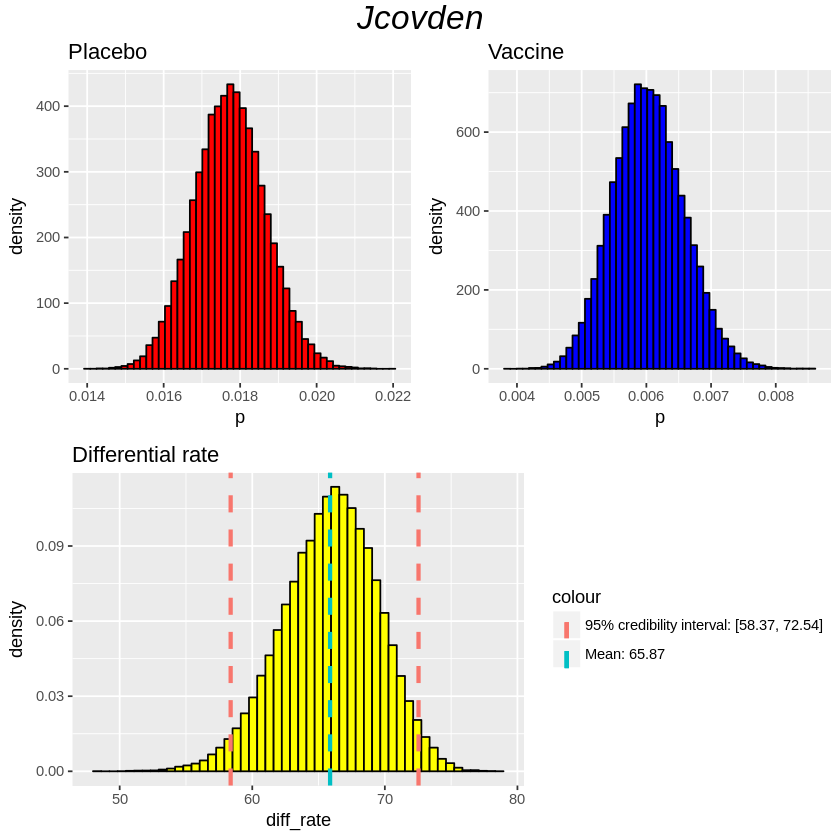

In [8]:
ggplot() +
geom_histogram(aes(x=chain_Jcovden.df['theta[1]'], y=..density..), color='black', fill='red', bins=50) +
labs(x='p', y='density', title='Placebo')-> Placebo_plot

ggplot() +
geom_histogram(aes(x=chain_Jcovden.df['theta[2]'], y=..density..), color='black', fill='blue', bins=50) +
labs(x='p', y='density', title='Vaccine')-> Vaccine_plot

ggplot()+
geom_histogram(aes(x=Jcovden_res$diff_rate, y=..density..), bins = 50,
                color='black', fill='yellow')+
geom_vline(aes(xintercept=58.37, color='95% credibility interval: [58.37, 72.54]'), linetype='dashed', size=1.2) +
geom_vline(aes(xintercept=72.54, color='95% credibility interval: [58.37, 72.54]'), linetype='dashed',  size=1.2) +
geom_vline(aes(xintercept=65.87, color='Mean: 65.87'), linetype='dashed',  size=1.2) +
labs(x ='diff_rate', y='density', title='Differential rate') -> Differential_rate_Jcovden

grid.arrange(Placebo_plot, Vaccine_plot, Differential_rate_Jcovden, layout_matrix=rbind(c(1,2),c(3,3)),
              top = textGrob("Jcovden",gp=gpar(fontsize=20,font=3)))

## Moderna (Spikevax)

Data from EMA

In [9]:
tot_vaccine <- 14134
tot_placebo <- 14073
patient <- c(rep(" Vaccine ", tot_vaccine ),
rep(" Placebo ", tot_placebo ))
# Number of patients tested postive after RCT:
pos_vaccine <- 11
pos_placebo <- 185
tested <- c(rep("Pos", pos_vaccine ),
            rep("Neg", tot_vaccine - pos_vaccine ),
            rep("Pos", pos_placebo ),
            rep("Neg", tot_placebo - pos_placebo ))
Moderna.tb <- tibble( tested = tested , patient = patient )
table( Moderna.tb[[2]], Moderna.tb[[1]])

           
              Neg   Pos
   Placebo  13888   185
   Vaccine  14123    11

JAGS model 

In [10]:
modelString <- "
    model {
        for ( i in 1:Ntot ) {
            tested[i]~dbern( theta[ patient [i]] )
        }
        for ( k in 1: Nclass ) {
            theta[k]~dbeta(3 , 100)
        }
    }"

dataList = list(tested = ifelse(Moderna.tb$tested == "Neg", 0, 1),
                patient = as.integer (factor(Moderna.tb$patient )),
                Ntot = nrow(Moderna.tb),
                Nclass = nlevels(factor(Moderna.tb$patient )))

Moderna_chains <- run.jags(modelString,
                           sample = 15000,
                           n.chains = 4,
                           method = "parallel",
                           monitor = "theta",
                           data = dataList )

Calling 4 simulations using the parallel method...
Following the progress of chain 1 (the program will wait for all chains
to finish before continuing):
Welcome to JAGS 4.1.0 on Tue May 30 09:18:34 2023
JAGS is free software and comes with ABSOLUTELY NO WARRANTY
Loading module: basemod: ok
Loading module: bugs: ok
. . Reading data file data.txt
. Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 28207
   Unobserved stochastic nodes: 2
   Total graph size: 56422
. Reading parameter file inits1.txt
. Initializing model
. Adaptation skipped: model is not in adaptive mode.
. Updating 4000
-------------------------------------------------| 4000
************************************************** 100%
. . Updating 15000
-------------------------------------------------| 15000
************************************************** 100%
. . . . Updating 0
. Deleting model
. 
All chains have finished
Note: the model did not r

In [11]:
summary(Moderna_chains)

,Lower95,Median,Upper95,Mean,SD,Mode,MCerr,MC%ofSD,SSeff,AC.10,psrf
theta[1],0.011375200,0.0132332000,0.01513610,0.0132592621,0.0009638637,NA,4.837409e-06,0.5,39701,0.0009856592,1.000156
theta[2],0.000506329,0.0009612405,0.00151239,0.0009827911,0.0002624078,NA,1.312039e-06,0.5,40000,-0.0008502086,1.000030


The vaccine efficancy obtain from a Randomized controlled trials (RCTs) is obtained as the percentile reduction in the frequency of illness among vaccinated peolple compared to people not vaccinated. In this example it is gonna refered as the differential rate.

In [12]:
chain_Moderna.df <- as.data.frame(as.mcmc(Moderna_chains))

#adding the differential rate (the efficancy of the vaccine)
Moderna_res <-  chain_Moderna.df %>% 
                select('theta[1]','theta[2]') %>%
                rename ( Placebo = 'theta[1]', Vaccine = 'theta[2]') %>%
                mutate (diff_rate = (( Placebo - Vaccine ) / Placebo) * 100,
                Placebo_perc = Placebo * 100,
                Vaccine_perc = Vaccine * 100)

allmcmc2_Moderna <- as.mcmc(Moderna_res[, 'diff_rate'])
summary(allmcmc2_Moderna)


Iterations = 1:60000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 60000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     92.551461       2.059394       0.008407       0.008407 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
87.96 91.31 92.75 94.02 96.00 


Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


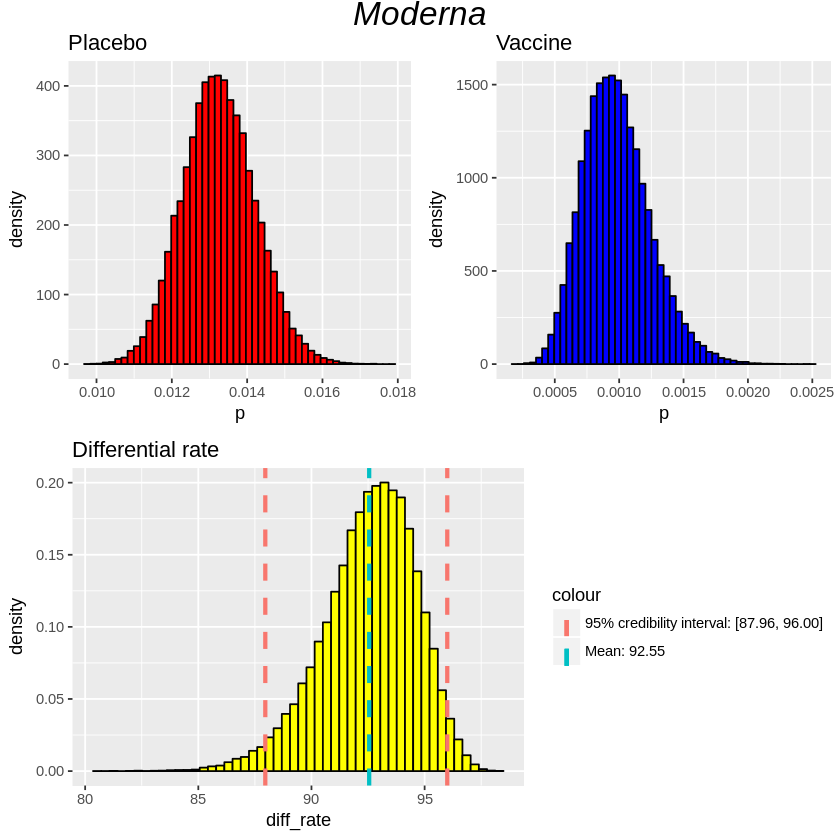

In [14]:
ggplot() +
geom_histogram(aes(x=chain_Moderna.df['theta[1]'], y=..density..), color='black', fill='red', bins=50) +
labs(x='p', y='density', title='Placebo')-> Placebo_plot

ggplot() +
geom_histogram(aes(x=chain_Moderna.df['theta[2]'], y=..density..), color='black', fill='blue', bins=50) +
labs(x='p', y='density', title='Vaccine')-> Vaccine_plot

ggplot()+
geom_histogram(aes(x=Moderna_res$diff_rate, y=..density..), bins= 50,
                color='black', fill='yellow')+
geom_vline(aes(xintercept=87.96, color='95% credibility interval: [87.96, 96.00]'), linetype='dashed', size=1.2) +
geom_vline(aes(xintercept=96.00, color='95% credibility interval: [87.96, 96.00]'), linetype='dashed',  size=1.2) +
geom_vline(aes(xintercept=92.55, color='Mean: 92.55'), linetype='dashed',  size=1.2) +
labs(x ='diff_rate', y='density', title='Differential rate') -> Differential_rate_Moderna

grid.arrange(Placebo_plot, Vaccine_plot, Differential_rate_Moderna, layout_matrix=rbind(c(1,2),c(3,3)),
              top = textGrob("Moderna",gp=gpar(fontsize=20,font=3)))

## AstraZeneca (Vaxzevria)

Data from EMA

In [15]:
tot_vaccine <- 5258
tot_placebo <- 5210
patient <- c(rep(" Vaccine ", tot_vaccine ),
rep(" Placebo ", tot_placebo ))
# Number of patients tested postive after RCT:
pos_vaccine <- 64
pos_placebo <- 154
tested <- c(rep("Pos", pos_vaccine ),
            rep("Neg", tot_vaccine - pos_vaccine ),
            rep("Pos", pos_placebo ),
            rep("Neg", tot_placebo - pos_placebo ))
AstraZeneca.tb <- tibble( tested = tested , patient = patient )
table( AstraZeneca.tb[[2]], AstraZeneca.tb[[1]])

           
             Neg  Pos
   Placebo  5056  154
   Vaccine  5194   64

JAGS model 

In [16]:
modelString <- "
    model {
        for ( i in 1:Ntot ) {
            tested[i]~dbern( theta[ patient [i]] )
        }
        for ( k in 1: Nclass ) {
            theta[k]~dbeta(3 , 100)
        }
    }"

dataList = list(tested = ifelse(AstraZeneca.tb$tested == "Neg", 0, 1),
                patient = as.integer (factor(AstraZeneca.tb$patient )),
                Ntot = nrow(AstraZeneca.tb),
                Nclass = nlevels(factor(AstraZeneca.tb$patient )))

AstraZeneca_chains <- run.jags(modelString,
                           sample = 15000,
                           n.chains = 4,
                           method = "parallel",
                           monitor = "theta",
                           data = dataList )

Calling 4 simulations using the parallel method...
Following the progress of chain 1 (the program will wait for all chains
to finish before continuing):
Welcome to JAGS 4.1.0 on Tue May 30 09:19:34 2023
JAGS is free software and comes with ABSOLUTELY NO WARRANTY
Loading module: basemod: ok
Loading module: bugs: ok
. . Reading data file data.txt
. Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 10468
   Unobserved stochastic nodes: 2
   Total graph size: 20944
. Reading parameter file inits1.txt
. Initializing model
. Adaptation skipped: model is not in adaptive mode.
. Updating 4000
-------------------------------------------------| 4000
************************************************** 100%
. . Updating 15000
-------------------------------------------------| 15000
************************************************** 100%
. . . . Updating 0
. Deleting model
. 
All chains have finished
Note: the model did not r

In [17]:
summary(AstraZeneca_chains)

,Lower95,Median,Upper95,Mean,SD,Mode,MCerr,MC%ofSD,SSeff,AC.10,psrf
theta[1],0.02498530,0.0295079,0.0341004,0.02955903,0.002325432,NA,1.147684e-05,0.5,41055,-0.00249106,1.000103
theta[2],0.00963863,0.0124289,0.0155822,0.01249265,0.001524190,NA,7.582597e-06,0.5,40406,0.00445433,1.000038


The vaccine efficancy obtain from a Randomized controlled trials (RCTs) is obtained as the percentile reduction in the frequency of illness among vaccinated peolple compared to people not vaccinated. In this example it is gonna refered as the differential rate.

In [18]:
chain_AstraZeneca.df <- as.data.frame(as.mcmc(AstraZeneca_chains))

#adding the differential rate (the efficancy of the vaccine)
AstraZeneca_res <-  chain_AstraZeneca.df %>% 
                    select('theta[1]','theta[2]') %>%
                    rename ( Placebo = 'theta[1]', Vaccine = 'theta[2]') %>%
                    mutate (diff_rate = (( Placebo - Vaccine ) / Placebo) * 100,
                    Placebo_perc = Placebo * 100,
                    Vaccine_perc = Vaccine * 100)

allmcmc2_AstraZeneca <- as.mcmc(AstraZeneca_res[, 'diff_rate'])
summary(allmcmc2_AstraZeneca)


Iterations = 1:60000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 60000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      57.45164        6.20644        0.02534        0.02482 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
44.24 53.54 57.81 61.77 68.56 


Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


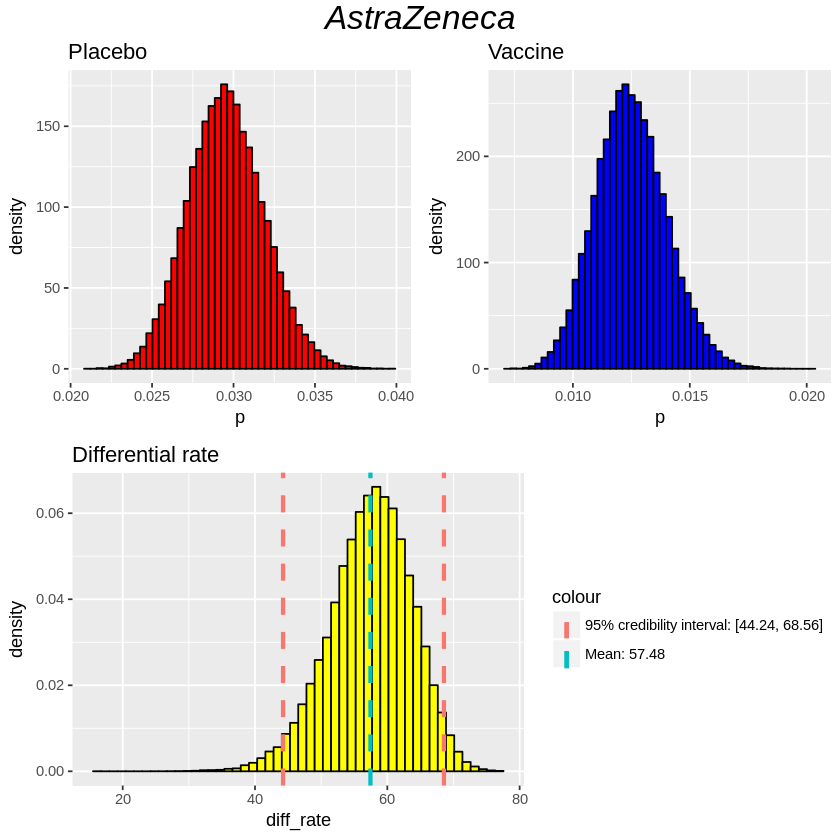

In [19]:
ggplot() +
geom_histogram(aes(x=chain_AstraZeneca.df['theta[1]'], y=..density..), color='black', fill='red', bins=50) +
labs(x='p', y='density', title='Placebo')-> Placebo_plot

ggplot() +
geom_histogram(aes(x=chain_AstraZeneca.df['theta[2]'], y=..density..), color='black', fill='blue', bins=50) +
labs(x='p', y='density', title='Vaccine')-> Vaccine_plot

ggplot()+
geom_histogram(aes(x=AstraZeneca_res$diff_rate, y=..density..), bins= 50,
                color='black', fill='yellow')+
geom_vline(aes(xintercept=44.24, color='95% credibility interval: [44.24, 68.56]'), linetype='dashed', size=1.2) +
geom_vline(aes(xintercept=68.56, color='95% credibility interval: [44.24, 68.56]'), linetype='dashed',  size=1.2) +
geom_vline(aes(xintercept=57.45, color='Mean: 57.48'), linetype='dashed',  size=1.2) +
labs(x ='diff_rate', y='density', title='Differential rate') -> Differential_rate_AstraZeneca

grid.arrange(Placebo_plot, Vaccine_plot, Differential_rate_AstraZeneca, layout_matrix=rbind(c(1,2),c(3,3)),
              top = textGrob("AstraZeneca",gp=gpar(fontsize=20,font=3)))

## Confronting results for the three vaccine 

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


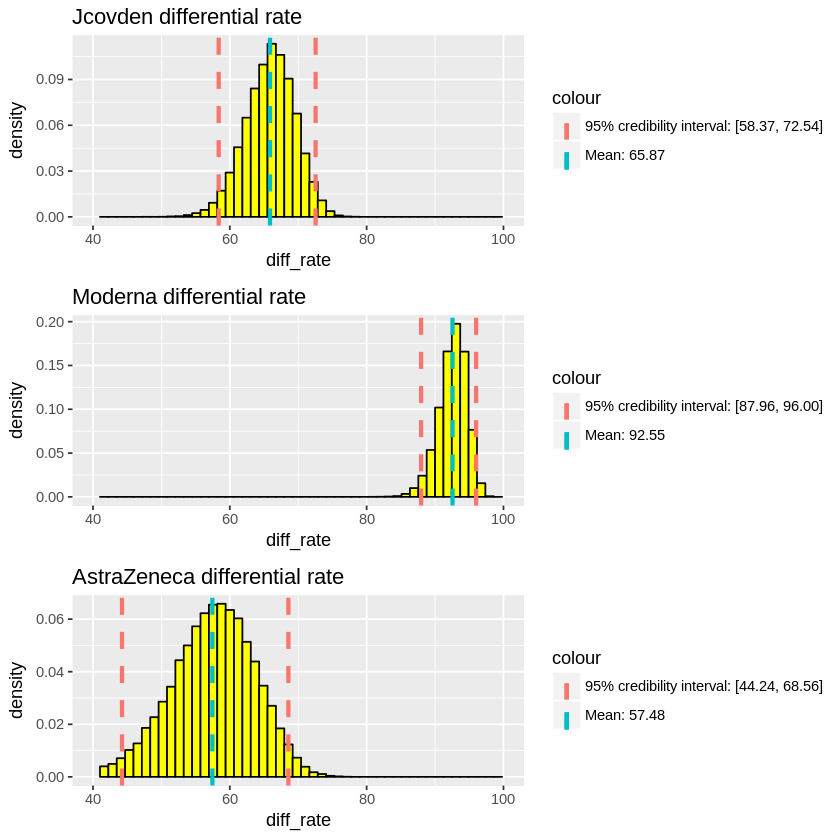

In [21]:
Differential_rate_Jcovden <- Differential_rate_Jcovden + xlim(40, 100) + labs(title='Jcovden differential rate')
Differential_rate_Moderna <- Differential_rate_Moderna + xlim(40, 100) + labs(title='Moderna differential rate')
Differential_rate_AstraZeneca <- Differential_rate_AstraZeneca + xlim(40, 100) + labs(title='AstraZeneca differential rate')

grid.arrange(grobs=list(Differential_rate_Jcovden, Differential_rate_Moderna, Differential_rate_AstraZeneca), ncol=1)

# Ex.3 